In [33]:
import numpy as np
import pandas as pd

import altair as alt

In [2]:
# 1
!head ~/git/bootcamp/data/wt_lac.csv

# Data digitized from Fig. 14a of Phillips, Annu. Rev. Condens. Matter Phys. 2015. 6:85–111.
# Data are for WT lac repressor.
[IPTG] (mM),fold change
9.899553766184622e-06,0.04069737452932376
0.0009743248304039901,0.07278760681556372
0.0020439288607228363,0.10528360929144977
0.004049167669375694,0.1994773129760492
0.0075843703842860734,0.34302367565894665
0.015782435900750708,0.459465965165661
0.029456448152963877,0.6400474544798063


In [8]:
np.loadtxt?

Signature: np.loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes')
Docstring:
Load data from a text file.

Each row in the text file must have the same number of values.

Parameters
----------
fname : file, str, or pathlib.Path
    File, filename, or generator to read.  If the filename extension is
    ``.gz`` or ``.bz2``, the file is first decompressed. Note that
    generators should return byte strings for Python 3k.
dtype : data-type, optional
    Data-type of the resulting array; default: float.  If this is a
    structured data-type, the resulting array will be 1-dimensional, and
    each row will be interpreted as an element of the array.  In this
    case, the number of columns used must match the number of fields in
    the data-type.
comments : str or sequence of str, optional
    The characters or list of characters used to indicate the start of a
    comment. For backwards com

In [30]:

wt=np.loadtxt("./git/bootcamp/data/wt_lac.csv",skiprows=3,delimiter=',')
q18m_lac=np.loadtxt("./git/bootcamp/data/q18m_lac.csv",skiprows=3,delimiter=',')
q18a_lac=np.loadtxt("./git/bootcamp/data/q18a_lac.csv",skiprows=3,delimiter=',')

for i in [wt,q18m_lac,q18a_lac]:
    df_i=pd.DataFrame(data={'IPTG (mM)':i[:,0],'fold change':i[:,1]})
    i_p=alt.Chart(df_i
    ).mark_point(
    ).encode(
        x='IPTG (mM):Q',
        y='fold change:Q'
        )

In [68]:
df_wt=pd.DataFrame(data={'IPTG (mM)':wt[:,0],'fold change':wt[:,1]})
df_q18m=pd.DataFrame(data={'IPTG (mM)':q18m_lac[:,0],'fold change':q18m_lac[:,1]})
df_q18a=pd.DataFrame(data={'IPTG (mM)':q18a_lac[:,0],'fold change':q18a_lac[:,1]})

In [95]:
wt_p=alt.Chart(df_wt
    ).mark_point(
    color='tomato'
    ).encode(
        x=alt.X('IPTG (mM):Q',scale=alt.Scale(type='log')),
        y='fold change:Q'
        ).interactive()

In [94]:
q18m_p=alt.Chart(df_q18m
    ).mark_point(
    color='green'
    ).encode(
        x=alt.X('IPTG (mM):Q',scale=alt.Scale(type='log')),
        y='fold change:Q'
        ).interactive()

In [93]:
q18a_p=alt.Chart(df_q18a
    ).mark_point(
    ).encode(
        x=alt.X('IPTG (mM):Q',scale=alt.Scale(type='log')),
        y='fold change:Q'
        ).interactive()

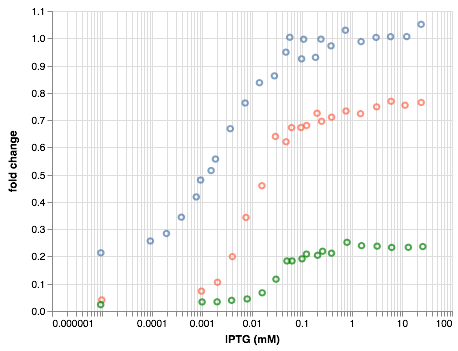

In [96]:
wt_p+q18m_p+q18a_p

In [124]:
# b)
def fold_change(c, RK, KdA=0.017,  KdI=0.002, Kswitch=5.8):
    fc = 1 / ((1 + RK * ((1 + c/KdA) ** 2) / (((1 + c/KdA) ** 2) + Kswitch * (1 + c/KdI) ** 2)))
    return fc

In [176]:
# c)
IPTG=np.logspace(-5,1,100)

In [177]:
fc_wt=fold_change(IPTG,141.5 )

In [185]:
fc_q18m=fold_change(IPTG,1332)
fc_q18a=fold_change(IPTG, 16.56)

In [186]:
df_wt_the=pd.DataFrame(data={'IPTG (mM)':IPTG,'fold change':fc_wt})
df_q18m_the=pd.DataFrame(data={'IPTG (mM)':IPTG,'fold change':fc_q18m})
df_q18a_the=pd.DataFrame(data={'IPTG (mM)':IPTG,'fold change':fc_q18a})

In [187]:
df_wt_the.head()

,IPTG (mM),fold change
0,0.000010,0.046183
1,0.000011,0.046232
2,0.000013,0.046289
3,0.000015,0.046354
4,0.000017,0.046430


In [188]:
wt_the_p=alt.Chart(df_wt_the
    ).mark_point(
    color='tomato'
    ).encode(
        x=alt.X('IPTG (mM):Q',scale=alt.Scale(type='log')),
        y='fold change:Q'
        ).interactive()

In [189]:
q18m_the_p=alt.Chart(df_q18m_the
    ).mark_point(
    color='green'
    ).encode(
        x=alt.X('IPTG (mM):Q',scale=alt.Scale(type='log')),
        y='fold change:Q'
        ).interactive()

In [190]:
q18a_the_p=alt.Chart(df_q18a_the
    ).mark_point(
    ).encode(
        x=alt.X('IPTG (mM):Q',scale=alt.Scale(type='log')),
        y='fold change:Q'
        ).interactive()

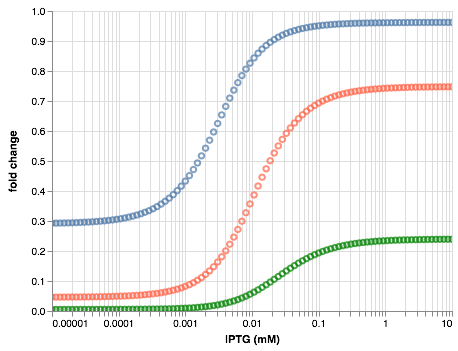

In [191]:
wt_the_p+q18m_the_p+q18a_the_p

In [211]:
# e)
def bohr_parameter(c, RK, KdA=0.017, KdI=0.002, Kswitch=5.8):
    bp = - np.log(RK) - np.log((1+c/KdA)**2 / (1 + c / KdA)**2 + Kswitch * (1+c/KdI)**2)
    return bp

In [ ]:
def fold_change_bohr(bohr_parameter)